# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

## Portfolios
*Review portfolio settings*

In [4]:
PM.review('portfolio')

Portfolio: MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, FCTR, TEST


In [5]:
PM.review_portfolio('WTR_2412')

{'strategy': 'WTR',
 'universe': 'UV_WTR',
 'file': 'pf_wtr2412_static',
 'path': 'transaction'}

In [6]:
#PM.review_strategy('WTR')
PM.review_portfolio('WTR_2412', strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally'}

In [7]:
#PM.review_universe('UV_WTR')
PM.review_portfolio('WTR_2412', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'to_daily': False,
 'path': 'data'}

In [8]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost_250207.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
Name: buy, dtype: float64

# Universe

In [9]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FCTR


In [10]:
WidgetUniverse

## K200

In [11]:
k200 = PM.create_universe('UV_K200')

200 securities from 2022-01-03 to 2025-03-07 uploaded.
Price data loaded


In [7]:
#k200.portfolio_data
#k200.get_names()

In [12]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1)
)
k200.download(**kw) if WidgetUniverse.values(0) else None

... done
200 securities from 2022-01-03 to 2025-03-12 downloaded.
kospi200_prices_250312.csv saved
df_prices updated
Execution time of download: 25.08 secs


## KRX

In [9]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded


In [15]:
#krx.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

## WTR

In [11]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2022-01-03 to 2025-03-07 uploaded.
Price data loaded


In [12]:
wtr.get_names('selected')

0) 069500: KODEX 200
1) 379800: KODEX 미국S&P500
2) 273130: KODEX 종합채권(AA-이상)액티브
3) 411060: ACE KRX금현물
4) 148070: KIWOOM 국고채10년
5) 284430: KODEX 200미국채혼합

In [13]:
#PM.review_universe('UV_WTR')

In [14]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

... done
6 securities from 2022-01-03 to 2025-03-12 downloaded.
etfs_weather_250312.csv saved
df_prices updated
Execution time of download: 0.77 secs


In [18]:
#wtr.save()

## FCTR

In [73]:
fctr = PM.create_universe('UV_FCTR')

7 securities from 2021-01-04 to 2024-11-22 uploaded.
Price data loaded


In [74]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [75]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

[*********************100%***********************]  7 of 7 completed

... done
7 securities from 2021-01-04 to 2024-12-13 downloaded.
etfs_factors_241213.csv saved
df_prices updated
Execution time of download: 1.38 secs


## FUND

In [6]:
fund = PM.create_universe('UV_FUND')

224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded


In [ ]:
kw = dict(
    n_years=20, 
    #close_today = WidgetUniverse.values(1),
    #tickers='selected',
    overwrite_master=False
)
fund.download(**kw) if WidgetUniverse.values(0) else None

100%|███████████████████████████████████████████████████████████████| 14/14 [00:01<00:00, 10.48it/s]


1.3 secs elapsed, 0.0 secs paused (0.0%)
224 tickers set to download


  8%|████▉                                                         | 18/224 [09:39<36:49, 10.72s/it]

In [15]:
_ = fund.save()

ERROR: failed to save as funds_prices_250131.csv exists


In [16]:
#fund.portfolio_data['universe']

### Case: Cost
*check [Additional Data](#Additional-Data) to update cost data (file_cost)*

In [77]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)
fee = cost['fee']

224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_250207.csv loaded


In [35]:
import random
#tickers = [k for k,v in fund.security_names.items() if 'TDF2045' in v]
tickers = random.sample(list(fund.security_names.keys()), 3)
#tickers = ['K55301BU5479', 'K55234DF2988', 'K55223BT1757']
fund.get_names(tickers)

0) K55232C70460: NH-Amundi글로벌혁신기업증권자투자신탁(UH)[주식]ClassC-P1e
1) K55301CQ5219: 미래에셋친디아컨슈머증권투자신탁 1(주식)종류C-Pe
2) K55307BC6945: 유리베트남알파연금저축증권자투자신탁[주식]_C/C-e

In [78]:
tickers = ['K55307DH1659', 'K55210E77483']
fund.get_names(tickers)

0) K55210E77483: 신한빅사이클자산배분증권자투자신탁[주식혼합-파생형](종류C-pe)
1) K55307DH1659: 유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e

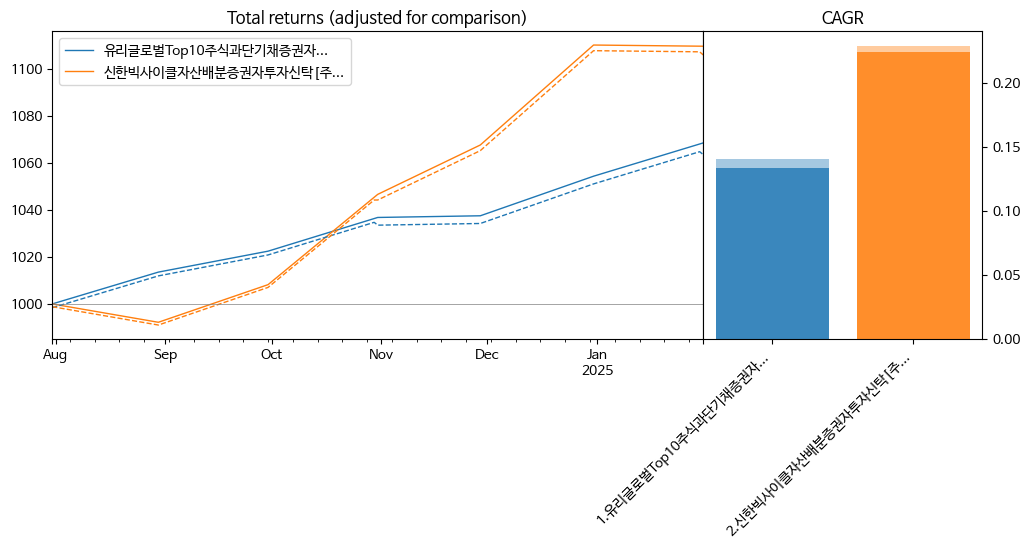

In [79]:
fund.plot(tickers, fee=fee, base=1000)

## LIQ

In [15]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [16]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2022-01-03 to 2025-02-27 uploaded.
Price data loaded


In [17]:
#liq.get_names()

In [18]:
kw = dict(
    n_years=3, 
    tickers= 'selected', #selected,
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

REMINDER: 24 tickers set regardless of market


100%|███████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 16.31it/s]

1.5 secs elapsed, 0.0 secs paused (0.0%)
... done
24 securities from 2022-01-03 to 2025-03-12 downloaded.
krx_liq_prices_250312.csv saved
df_prices updated
Execution time of download: 2.19 secs


## Additional Data

### Cost

*Check missing cost data*

In [23]:
_ = PM.check_cost('UV_FUND', file_cost, path_tran)

Cost data transaction_cost_250207.csv loaded
224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded


*Update cost data for uiniverse UV_FUND, except for which of universes updated with manual editting*

In [23]:
fd = FundDownloader.create(fund)
#fd.export_cost('UV_FUND', 'transaction_cost', path=path_tran, update=True)
fd.export_cost('UV_FUND')

Data for 224 funds loaded.
Cost data transaction_cost_241217.csv loaded
Cost data saved to transaction_cost_250207.csv


### Financial Ratio

In [23]:
WidgetUniverse

In [24]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-01-03 loaded


In [25]:
start_fr = '2023-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse.values(0):
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse.values(1)
    )
    fr.download(tickers, start_fr, **kw)

200 securities from 2022-01-03 to 2025-02-03 uploaded.
Price data loaded


100%|█████████████████████████████████████████████████████████████| 200/200 [13:12<00:00,  3.96s/it]


13.2 mins elapsed, 30.0 secs paused (3.8%)
Financial ratios of 200 stocks from 2023-01-02 to 2025-02-03 downloaded
kospi200_ratios_250203.csv saved


In [26]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [27]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

200 securities from 2022-01-03 to 2025-02-03 uploaded.
Price data loaded
Ratio: 2023-01-02 ~ 2025-02-03
Price: 2022-01-03 ~ 2025-02-03


# Performance

In [9]:
PM.review()

Portfolio: MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, FCTR, TEST


In [10]:
pm = PM(
    'MMT_2407', 'PER_2410', 'WTR_2407', 'WTR_2412'
)

MMT_2407:
200 securities from 2022-01-03 to 2025-03-12 uploaded.
Price data loaded
Transaction record to 2025-02-14 loaded

PER_2410:
200 securities from 2022-01-03 to 2025-03-12 uploaded.
Price data loaded
Transaction record to 2024-11-11 loaded
Run check_universe to get the list of missing assets

WTR_2407:
6 securities from 2022-01-03 to 2025-03-12 uploaded.
Price data loaded
Transaction record to 2025-02-13 loaded

WTR_2412:
6 securities from 2022-01-03 to 2025-03-12 uploaded.
Price data loaded
Transaction record to 2024-12-18 loaded



In [13]:
#pm.load('LIQ')
pm.load('TDF_2406','HANA_2408')

TDF_2406:
224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Transaction record to 2025-01-15 loaded

HANA_2408:
224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Transaction record to 2024-08-01 loaded



security_names updated
Data of tickers 009900, 016380 downloaded


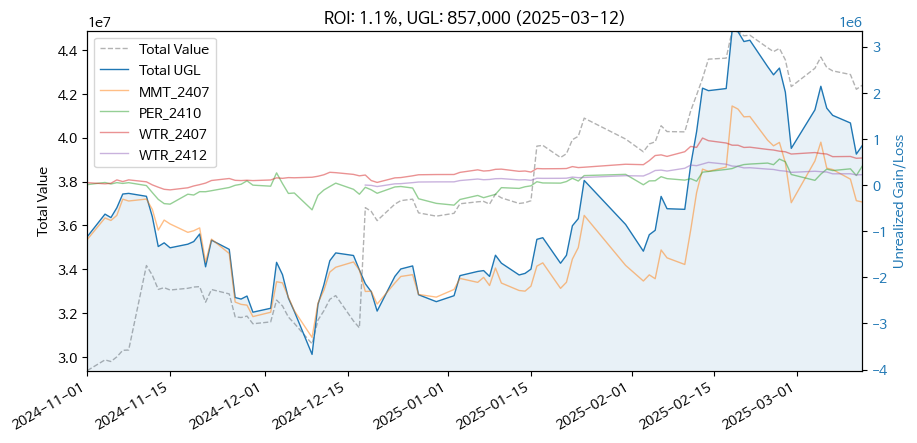

In [11]:
start_date='2024-11-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date)
pm.plot(start_date=start_date, roi=False)

In [12]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [13]:
pm.summary(date=w_date.value)

,MMT_2407,PER_2410,WTR_2407,WTR_2412,TOTAL
start,2024-07-22,2024-10-17,2024-07-18,2024-12-18,2024-07-18
end,2025-03-12,2025-03-12,2025-03-12,2025-03-12,2025-03-12
buy,"47,569,000","12,249,820","10,365,272","5,783,200","75,967,292"
sell,"30,865,952","2,621,865","943,120",0.0,"34,430,937"
value,"16,336,100","10,038,920","10,009,630","6,008,238","42,392,888"
ugl,"-366,948","410,965","587,478","225,038","856,533"
roi,-0.007714,0.033549,0.056678,0.038912,0.011275


*print summary for google sheet 금융자산운용*

In [14]:
pm.util_print_summary(date=w_date.value)

2025-03-12, MMT, 2407, , , , 평가, , 47569000, 30865952, 16336100, -366948, -0.007714015430217214
2025-03-12, PER, 2410, , , , 평가, , 12249820, 2621865, 10038920, 410965, 0.033548656225152795
2025-03-12, WTR, 2407, , , , 평가, , 10365272, 943120, 10009630, 587478, 0.05667752857812114
2025-03-12, WTR, 2412, , , , 평가, , 5783200, 0.0, 6008238, 225038, 0.03891236685572008


### Fund in Porfolios

In [5]:
pm = PM(
    'TDF_2406','HANA_2408','SAVE_2503',
    verbose=False
)

TDF_2406: done
HANA_2408: done
SAVE_2503: done


In [6]:
pm.summary()

,TDF_2406,HANA_2408,TOTAL
start,2024-06-19,2024-08-01,2024-06-19
end,2025-01-31,2025-01-31,2025-01-31
buy,"35,000,000","9,990,000","44,990,000"
sell,0.0,0.0,0.0
value,"35,010,787","10,194,581","45,205,368"
ugl,"10,787","204,581","215,368"
roi,0.000308,0.020479,0.004787


In [8]:
pm.portfolios['TDF_2406'].view_record()

name  ratio  \
date       ticker                                                             
2024-06-19 K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
2025-01-15 K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-06-19 K55301BU6139      5000000  5000000  0.5000    0.500 2024-06-19  
           K55206C95800      5000000  5000000  0.5000    0.500 2024-06-19  
2025-01-15 K55206C95800            0  5077506  0.1429    0.144 2025-01-15  
           K55301BU6139            0  5077009  0.1429    0.144 2025-01-15  
           K55364CF7048      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234BY9966      5000000  5000000  0.1429    0.142 2025-01-15  
           K55213C50702      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234DF3150      5000000  5000000  0.1429    0.142 2025-01-15  
           K55301BU6253      5000000  5000000  0.1429    0.142 2025-01-15

In [9]:
pm._valuate('TDF_2406','HANA_2408','SAVE_2503')

,TDF_2406,HANA_2408
start,2024-06-19,2024-08-01
end,2025-01-31,2025-01-31
buy,35000000.0,9990000.0
sell,0.0,0.0
value,35010787.0,10194581.0
ugl,10787.0,204581.0
roi,0.000308,0.020479


In [24]:
def test(self, *pf_names, date=None, int_to_str=True):
    """
    get cashflow & pnl of portfolios on date
    """       
    pf_names = self.check_portfolios(*pf_names)
    if len(pf_names) == 0:
        return None

    col_pf = 'portfolio'
    df_all = None
    no_res = []
    for name in pf_names:
        pf = self.portfolios[name]
        df = pf.valuate(date=date, total=False, int_to_str=False, print_msg=False)
        if df is None:
            no_res.append(name)
        else:
            df = df.assign(**{col_pf:name}).set_index(col_pf, append=True)
            df_all = df if df_all is None else pd.concat([df_all, df]) 
    return df_all.swaplevel()

In [55]:
def _valuate(self, *pf_names, date=None, total=True):
    """
    return evaluation summary df the portfolios in pf_names
    pf_names: list of portfolio names
    date: date for values on date, None for values on last date, 'all' for history
    """
    col_pf = 'portfolio'
    df_all = None
    no_res = []
    for name in pf_names:
        pf = self.portfolios[name]
        df = pf.valuate(date=date, total=total, int_to_str=False, print_msg=False)
        if df is None:
            no_res.append(name)
        else:
            #if (date == 'all' and total) or (date != 'all' and not total):
            if (date == 'all') or (date != 'all' and not total):
                # add portfolio name as index
                df = df.assign(**{col_pf:name}).set_index(col_pf, append=True)
                axis = 0
            else:
                df = df.to_frame(name)
                axis = 1
            df_all = df if df_all is None else pd.concat([df_all, df], axis=axis) 

    df_all = df_all.sort_index() if date == 'all' else df_all
    return df_all



def test(self, *pf_names, date=None):
    df_all = _valuate(self, *pf_names, date=date, total=False)
    return df_all.swaplevel()

In [56]:
_valuate(pm, 'TDF_2406','HANA_2408','SAVE_2503', date='all', total=False).head()

buy  sell    value     ugl       roi
date       ticker       portfolio                                            
2024-06-19 K55206C95800 TDF_2406   5000000.0   0.0  5000000     0.0  0.000000
           K55301BU6139 TDF_2406   5000000.0   0.0  5000000     0.0  0.000000
2024-06-20 K55206C95800 TDF_2406   5000000.0   0.0  5004787  4787.0  0.000957
           K55301BU6139 TDF_2406   5000000.0   0.0  5004819  4819.0  0.000964
2024-06-21 K55206C95800 TDF_2406   5000000.0   0.0  5009574  9574.0  0.001915

In [57]:
_valuate(pm, 'TDF_2406','HANA_2408','SAVE_2503', date=None, total=False).head()

,,name,start,end,buy,sell,value,ugl,roi
ticker,portfolio,,,,,,,,
K55301BU6139,TDF_2406,미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e,2024-06-19,2025-01-31,5000000.0,0.0,5107740,107740.0,0.021548
K55206C95800,TDF_2406,키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금),2024-06-19,2025-01-31,5000000.0,0.0,5095376,95376.0,0.019075
K55301BU6253,TDF_2406,미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e,2025-01-15,2025-01-31,5000000.0,0.0,5031748,31748.0,0.006350
K55213C50702,TDF_2406,한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금),2025-01-15,2025-01-31,5000000.0,0.0,5025586,25586.0,0.005117
K55234DF3150,TDF_2406,IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re,2025-01-15,2025-01-31,5000000.0,0.0,4996041,-3959.0,-0.000792


In [58]:
_valuate(pm, 'TDF_2406','HANA_2408','SAVE_2503', date=None, total=True).head()

,TDF_2406,HANA_2408
start,2024-06-19,2024-08-01
end,2025-01-31,2025-01-31
buy,35000000.0,9990000.0
sell,0.0,0.0
value,35010787.0,10194581.0


In [59]:
_valuate(pm, 'TDF_2406','HANA_2408','SAVE_2503', date='all', total=True).head()

,,buy,sell,value,ugl,roi
date,portfolio,,,,,
2024-06-19,TDF_2406,10000000.0,0.0,10000000,0.0,0.000000
2024-06-20,TDF_2406,10000000.0,0.0,10009607,9607.0,0.000961
2024-06-21,TDF_2406,10000000.0,0.0,10019214,19214.0,0.001921
2024-06-22,TDF_2406,10000000.0,0.0,10028821,28821.0,0.002882
2024-06-23,TDF_2406,10000000.0,0.0,10038428,38428.0,0.003843


In [54]:
pm._valuate('TDF_2406','HANA_2408','SAVE_2503', date='all').head()

,,buy,sell,value,ugl,roi
date,portfolio,,,,,
2024-06-19,TDF_2406,10000000.0,0.0,10000000,0.0,0.000000
2024-06-20,TDF_2406,10000000.0,0.0,10009607,9607.0,0.000961
2024-06-21,TDF_2406,10000000.0,0.0,10019214,19214.0,0.001921
2024-06-22,TDF_2406,10000000.0,0.0,10028821,28821.0,0.002882
2024-06-23,TDF_2406,10000000.0,0.0,10038428,38428.0,0.003843


In [31]:
import pandas as pd
df = test(pm, 'TDF_2406','HANA_2408','SAVE_2503')

In [32]:
df

name  \
portfolio ticker                                                      
TDF_2406  K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   
          K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   
          K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e   
          K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)   
          K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re   
          K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re   
          K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e   
HANA_2408 KR5101888398              한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)   
          KR5370AP9956                 AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce   
          KR5236AS4826                 한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E   
          K55306CV9946        다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce   

                            start        end        buy  sell    value  \
portfolio ticker                                                         
TDF_2406  K55301BU6139 2024-06-19 2025-01-31  5000000.0   0.0  5107740   
          K55206C95800 2024-06-19 2025-01-31  5000000.0   0.0  5095376   
          K55301BU6253 2025-01-15 2025-01-31  5000000.0   0.0  5031748   
          K55213C50702 2025-01-15 2025-01-31  5000000.0   0.0  5025586   
          K55234DF3150 2025-01-15 2025-01-31  5000000.0   0.0  4996041   
          K55234BY9966 2025-01-15 2025-01-31  5000000.0   0.0  4926303   
          K55364CF7048 2025-01-15 2025-01-31  5000000.0   0.0  4827991   
HANA_2408 KR5101888398 2024-08-01 2025-01-31  5020000.0   0.0  5174476   
          KR5370AP9956 2024-08-01 2025-01-31  1860000.0   0.0  1922984   
          KR5236AS4826 2024-08-01 2025-01-31  2420000.0   0.0  2415436   
          K55306CV9946 2024-08-01 2025-01-31   690000.0   0.0   681683   

                             ugl       roi  
portfolio ticker                            
TDF_2406  K55301BU6139  107740.0  0.021548  
          K55206C95800   95376.0  0.019075  
          K55301BU6253   31748.0  0.006350  
          K55213C50702   25586.0  0.005117  
          K55234DF3150   -3959.0 -0.000792  
          K55234BY9966  -73697.0 -0.014739  
          K55364CF7048 -172009.0 -0.034402  
HANA_2408 KR5101888398  154476.0  0.030772  
          KR5370AP9956   62984.0  0.033862  
          KR5236AS4826   -4564.0 -0.001886  
          K55306CV9946   -8317.0 -0.012054

In [26]:
pm.portfolios['TDF_2406'].valuate(

name  \
portfolio ticker                                                      
TDF_2406  K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   
          K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   
          K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e   
          K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)   
          K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re   
          K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re   
          K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e   
HANA_2408 KR5101888398              한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)   
          KR5370AP9956                 AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce   
          KR5236AS4826                 한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E   
          K55306CV9946        다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce   

                            start        end        buy  sell    value  \
portfolio ticker                                                         
TDF_2406  K55301BU6139 2024-06-19 2025-01-31  5000000.0   0.0  5107740   
          K55206C95800 2024-06-19 2025-01-31  5000000.0   0.0  5095376   
          K55301BU6253 2025-01-15 2025-01-31  5000000.0   0.0  5031748   
          K55213C50702 2025-01-15 2025-01-31  5000000.0   0.0  5025586   
          K55234DF3150 2025-01-15 2025-01-31  5000000.0   0.0  4996041   
          K55234BY9966 2025-01-15 2025-01-31  5000000.0   0.0  4926303   
          K55364CF7048 2025-01-15 2025-01-31  5000000.0   0.0  4827991   
HANA_2408 KR5101888398 2024-08-01 2025-01-31  5020000.0   0.0  5174476   
          KR5370AP9956 2024-08-01 2025-01-31  1860000.0   0.0  1922984   
          KR5236AS4826 2024-08-01 2025-01-31  2420000.0   0.0  2415436   
          K55306CV9946 2024-08-01 2025-01-31   690000.0   0.0   681683   

                             ugl       roi  
portfolio ticker                            
TDF_2406  K55301BU6139  107740.0  0.021548  
          K55206C95800   95376.0  0.019075  
          K55301BU6253   31748.0  0.006350  
          K55213C50702   25586.0  0.005117  
          K55234DF3150   -3959.0 -0.000792  
          K55234BY9966  -73697.0 -0.014739  
          K55364CF7048 -172009.0 -0.034402  
HANA_2408 KR5101888398  154476.0  0.030772  
          KR5370AP9956   62984.0  0.033862  
          KR5236AS4826   -4564.0 -0.001886  
          K55306CV9946   -8317.0 -0.012054

# Transaction

## MMT

In [11]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-03-07 uploaded.
Price data loaded
Cost data transaction_cost_250207.csv loaded
Transaction record to 2025-02-14 loaded


In [12]:
# run after editting record file
pf_mmt.update_record()

In [13]:
pf_mmt.view_record(-2, nshares=False)

name     ratio  transaction      net  weight  \
date       ticker                                                        
2025-01-16 000150           두산  1.000000            0  2880000     0.2   
           003230         삼양식품  1.000000            0  2310000     0.2   
           010120  LS ELECTRIC  0.899535      3225000  3225000     0.2   
           010130         고려아연  0.957796     -1706000        0     0.0   
           012450    한화에어로스페이스  1.031414      2673999  2674000     0.2   
           267260     HD현대일렉트릭  1.000000            0  2922500     0.2   
           298040        효성중공업  0.997872     -2350000        0     0.0   
2025-02-14 000150           두산  1.037209     -3225000        0     0.0   
           003230         삼양식품  0.986425       884000  3536000     0.2   
           010120  LS ELECTRIC  1.014706      -238000  3332000     0.2   
           012450    한화에어로스페이스  0.922145      -578001  3468000     0.2   
           267260     HD현대일렉트릭  1.050340       735000  3307500     0.2   
           298040        효성중공업  1.017727      3356500  3356500     0.2   

                   weight*      date*  
date       ticker                      
2025-01-16 000150    0.206 2025-01-17  
           003230    0.165 2025-01-17  
           010120    0.230 2025-01-17  
           010130    0.000 2025-01-17  
           012450    0.191 2025-01-17  
           267260    0.209 2025-01-17  
           298040    0.000 2025-01-17  
2025-02-14 000150    0.000 2025-02-17  
           003230    0.208 2025-02-17  
           010120    0.196 2025-02-17  
           012450    0.204 2025-02-17  
           267260    0.195 2025-02-17  
           298040    0.197 2025-02-17

*daily transactions for book keeping*

In [14]:
pf_mmt.get_cash_history(cumsum=False, date_actual=True)

,buy,sell
date*,,
2024-07-22,14255518,0
2024-08-22,6159324,4321649
2024-09-26,0,2819812
2024-09-27,2825103,0
2024-10-08,3072111,3348589
2024-11-11,3038510,3805898
2024-12-17,7345267,8431189
2025-01-17,5899213,4048551
2025-02-17,4975681,4033580


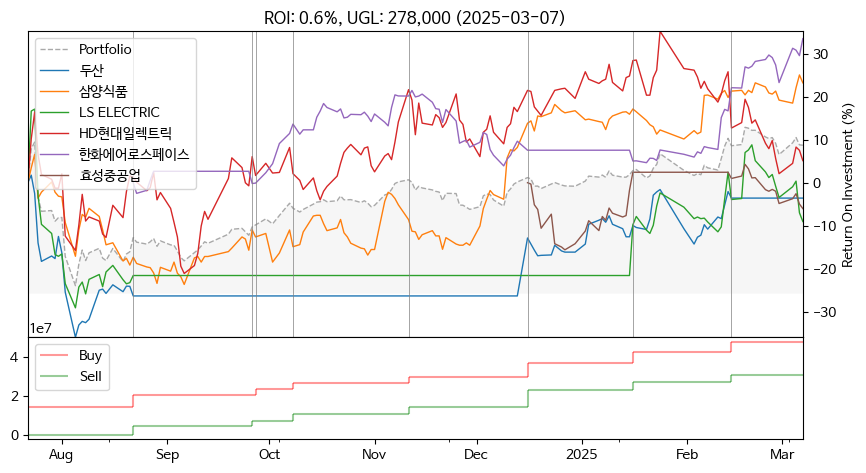

In [15]:
pf_mmt.plot(total=False)

In [16]:
date = None
#date = '2025-01-17'
pf_mmt.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-22, 2025-03-07, 47570731, 30809270, 17039500, 278039, 0.005844740246033986


start    2024-07-22
end      2025-03-07
buy      47,570,731
sell     30,809,270
value    17,039,500
ugl         278,039
roi        0.005845
dtype: object

*ROI of held assets*

In [17]:
pf_mmt.valuate(date, total=False)

,name,start,end,buy,sell,value,ugl,roi
ticker,,,,,,,,
012450,한화에어로스페이스,2024-08-22,2025-03-07,"8,042,584","6,350,818","4,386,000","2,694,234",0.334996
003230,삼양식품,2024-07-22,2025-03-07,"4,578,167","2,017,289","3,624,000","1,063,122",0.232216
267260,HD현대일렉트릭,2024-07-22,2025-03-07,"3,561,130","706,201","3,037,500","182,571",0.051268
000150,두산,2024-07-22,2025-02-14,"5,325,194","5,134,354",0.0,"-190,840",-0.035837
298040,효성중공업,2024-12-16,2025-03-07,"5,646,706","2,345,684","2,961,000","-340,021",-0.060216
010120,LS ELECTRIC,2024-07-22,2025-03-07,"5,889,214","2,326,520","3,031,000","-531,695",-0.090283


In [18]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [19]:
kw = dict(
    #sell = ['010120'],
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
_ = pf_mmt.transaction_halt(**kw) 

Updated with transaction on 2025-03-07
Set save=True to save transaction record
ROI: 0.6%, UGL: 278,039 (2025-03-07)


In [20]:
kw = dict(
    nshares = True,
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
)

_ = pf_mmt.transaction_pipeline(**kw)

5 tickers selected by Total return from 2024-02-28 to 2025-02-28
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 7 %
ROI: 0.5%, UGL: 262,429 (2025-03-07)
Set save=True to save transaction record


In [21]:
pf_mmt.view_record(-2, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                           
2025-02-14 000150           두산  322499          -10    0     0.0    0.000   
           003230         삼양식품  883999            1    4     0.2    0.208   
           010120  LS ELECTRIC  238000           -1   14     0.2    0.196   
           012450    한화에어로스페이스  578000           -1    6     0.2    0.204   
           267260     HD현대일렉트릭  367500            2    9     0.2    0.195   
           298040        효성중공업  479499            7    7     0.2    0.197   
2025-03-07 000150           두산  313500           10   10     0.2    0.204   
           003230         삼양식품  906000           -1    3     0.2    0.176   
           010120  LS ELECTRIC  216500            1   15     0.2    0.211   
           012450    한화에어로스페이스  731000           -2    4     0.2    0.190   
           042660         한화오션   80400           42   42     0.2    0.219   
           267260     HD현대일렉트릭  337500           -9    0     0.0    0.000   
           298040        효성중공업  423000           -7    0     0.0    0.000   

                       date*  
date       ticker             
2025-02-14 000150 2025-02-17  
           003230 2025-02-17  
           010120 2025-02-17  
           012450 2025-02-17  
           267260 2025-02-17  
           298040 2025-02-17  
2025-03-07 000150 2025-03-07  
           003230 2025-03-07  
           010120 2025-03-07  
           012450 2025-03-07  
           042660 2025-03-07  
           267260 2025-03-07  
           298040 2025-03-07

## KRX
*simulation*

In [40]:
pf_krx = PM.create_portfolio('KRX', **kw_cost)

ERROR: No 'KRX'. select one of MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, TEST


In [ ]:
pf_krx.view_record(-2)

In [ ]:
pf_krx.valuate()

In [22]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 tickers selected by Total return from 2023-08-02 to 2024-08-02
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: -3.7%, UGL: -364,000  (2024-10-08)
Set save=True to save transaction record


name  ratio  transaction      net  weight  weight*  \
date       ticker                                                         
2024-09-02 078860  엔에스이엔엠      1      1998150  1998150     0.2    0.201   
           016670     디모아      1      1996800  1996800     0.2    0.201   
           033790      피노      1      1996750  1996750     0.2    0.201   
           159910   스킨앤스킨      1      1999880  1999880     0.2    0.202   
           196170    알테오젠      1      1932000  1932000     0.2    0.195   

                       date*  
date       ticker             
2024-09-02 078860 2024-09-02  
           016670 2024-09-02  
           033790 2024-09-02  
           159910 2024-09-02  
           196170 2024-09-02

## PER

In [33]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-02-03 loaded


In [34]:
pf_per = PM.create_portfolio('PER_2410', df_additional=df_ratio, **kw_cost)

200 securities from 2022-01-03 to 2025-02-27 uploaded.
Price data loaded
Cost data transaction_cost_250207.csv loaded
Transaction record to 2024-11-11 loaded
Run check_universe to get the list of missing assets


*Set assets to liquidate as delisted from KOSPI200*

In [35]:
tickers_liq = pf_per.check_universe()

In [36]:
#pf_per.view_record(-2)

In [37]:
pf_per.valuate(total=True, print_msg=True, join_str=True)

security_names updated
Data of tickers 009900, 016380 downloaded
Tickers 009900, 016380 added to universe
start, end, buy, sell, value, ugl, roi
2024-10-17, 2025-02-27, 12250266, 2617050, 10133900, 500684, 0.04087130675450834


start    2024-10-17
end      2025-02-27
buy      12,250,266
sell      2,617,050
value    10,133,900
ugl         500,684
roi        0.040871
dtype: object

In [38]:
#pf_per.update_record()
#pf_per.view_record(-2)

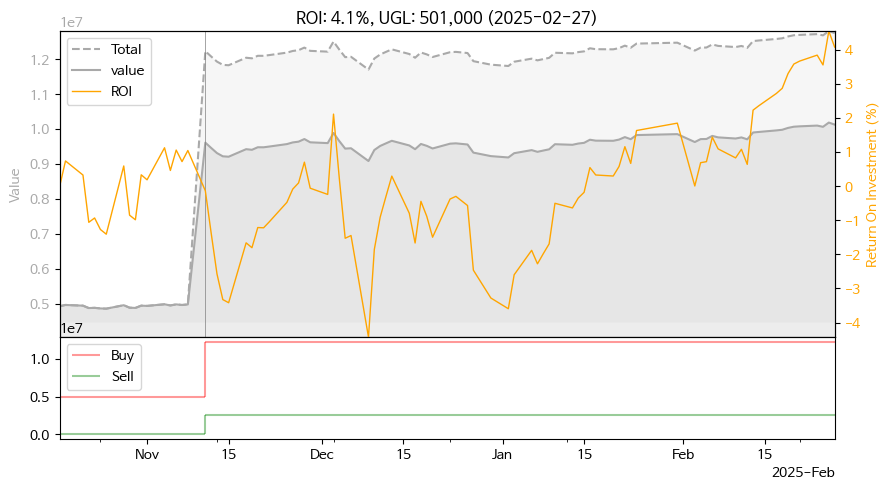

In [39]:
pf_per.plot()

In [47]:
start_fr = '2023-01-01'
_ = pf_per.check_additional(start_fr)

Returning price and additional


In [48]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [49]:
kw = dict(
    #sell = tickers_liq,
    halt = tickers_liq, # testing
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
_ = pf_per.transaction_halt(**kw) 
#pf_per.view_record(-1)

Trading of assets 009900, 016380 to halt
Updated with transaction on 2025-02-12
Set save=True to save transaction record
ROI: -0.1%, UGL: -13,457 (2025-02-12)


In [52]:
kw = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)
_ = pf_per.transaction_pipeline(**kw)

20 tickers selected by Financial Ratio from 2024-12-02 to 2025-01-31
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 4 %
Tickers 009900, 016380 added to universe
ROI: 2.0%, UGL: 295,291 (2025-02-12)
Set save=True to save transaction record


In [53]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2025-01-31 000270       기아  102000           -1    4    0.05    0.043   
           001450     현대해상   24750            2   19    0.05    0.050   
           003030   세아제강지주  205000            0    2    0.05    0.044   
           005380      현대차  206000            0    2    0.05    0.044   
           005830   DB손해보험   97100            1    5    0.05    0.052   
           005850      에스엘   32050           -1   15    0.05    0.051   
           009900     명신산업    1000         -500    0    0.00    0.000   
           009970  영원무역홀딩스   81900            1    6    0.05    0.052   
           010060   OCI홀딩스   79100           -2    6    0.05    0.050   
           016380     KG스틸    1013         -494    0    0.00    0.000   
           017800   현대엘리베이   53000           -9    0    0.00    0.000   
           024110     기업은행   15530           -4   31    0.05    0.051   
           028050    삼성E&A   18010           27   27    0.05    0.052   
           047040     대우건설    3375            6  146    0.05    0.052   
           069260   TKG휴켐스   16950           29   29    0.05    0.052   
           078930       GS   38500            0   12    0.05    0.049   
           088350     한화생명    2495           17  197    0.05    0.052   
           105630     한세실업   13150           37   37    0.05    0.052   
           111770     영원무역   43950           -1   11    0.05    0.051   
           138930  BNK금융지주   12160          -55    0    0.00    0.000   
           139130  DGB금융지주    9220          -10   53    0.05    0.052   
           241560     두산밥캣   48050           -3   10    0.05    0.051   
           316140   우리금융지주   16100           -2   30    0.05    0.051   
           383220      F&F   64300            7    7    0.05    0.048   

                       date*  
date       ticker             
2025-01-31 000270 2025-01-31  
           001450 2025-01-31  
           003030 2025-01-31  
           005380 2025-01-31  
           005830 2025-01-31  
           005850 2025-01-31  
           009900 2025-01-31  
           009970 2025-01-31  
           010060 2025-01-31  
           016380 2025-01-31  
           017800 2025-01-31  
           024110 2025-01-31  
           028050 2025-01-31  
           047040 2025-01-31  
           069260 2025-01-31  
           078930 2025-01-31  
           088350 2025-01-31  
           105630 2025-01-31  
           111770 2025-01-31  
           138930 2025-01-31  
           139130 2025-01-31  
           241560 2025-01-31  
           316140 2025-01-31  
           383220 2025-01-31

In [54]:
#pf_per.update_record()

## WTR
*modified all weather*

In [40]:
pf = 'WTR_2407'
#pf = 'WTR_2412' # 배현정
pf_wtr = PM.create_portfolio(pf, **kw_cost) 

6 securities from 2022-01-03 to 2025-02-27 uploaded.
Price data loaded
Cost data transaction_cost_250207.csv loaded
Transaction record to 2025-02-13 loaded


In [41]:
#pf_wtr.portfolio_data['strategy']
pf_wtr.update_record()

In [42]:
pf_wtr.view_record(-2, nshares=True)

name   price  transaction  net  weight  \
date       ticker                                                           
2024-11-20 069500             KODEX 200   32902            7   49  0.1670   
           148070          KOSEF 국고채10년  113034           -1   13  0.1670   
           273130  KODEX 종합채권(AA-이상)액티브  114815            0   14  0.1670   
           284430        KODEX 200미국채혼합   12585            4  128  0.1670   
           379800      KODEX 미국S&P500TR   18790           -8   86  0.1670   
           411060            ACE KRX금현물   17040          -10   96  0.1670   
2025-02-13 069500             KODEX 200   34490            1   51  0.1667   
           148070         KIWOOM 국고채10년  115030            1   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117125            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090            5  134  0.1667   
           379800        KODEX 미국S&P500   20215            0   86  0.1667   
           411060            ACE KRX금현물   24065          -21   75  0.1667   

                   weight*      date*  
date       ticker                      
2024-11-20 069500    0.168 2024-11-20  
           148070    0.158 2024-11-20  
           273130    0.167 2024-11-20  
           284430    0.169 2024-11-20  
           379800    0.168 2024-11-20  
           411060    0.170 2024-11-20  
2025-02-13 069500    0.168 2025-02-14  
           148070    0.165 2025-02-14  
           273130    0.157 2025-02-14  
           284430    0.168 2025-02-14  
           379800    0.168 2025-02-14  
           411060    0.173 2025-02-14

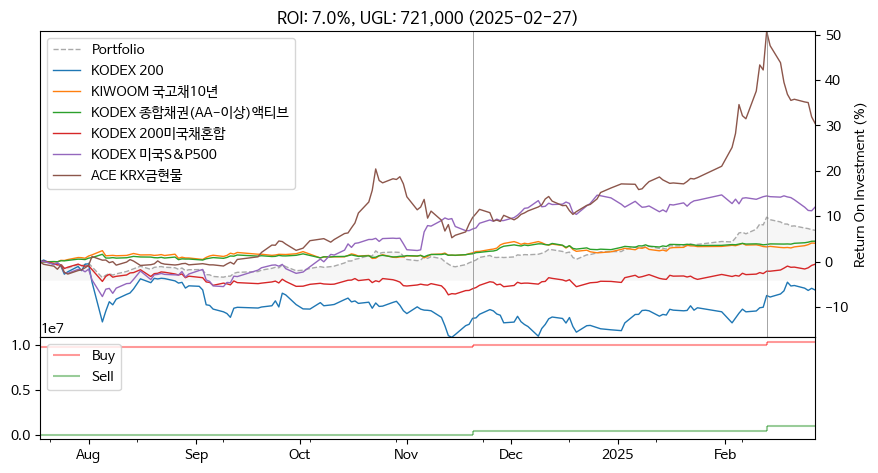

In [43]:
pf_wtr.plot(total=False)

In [44]:
date = None
pf_wtr.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-18, 2025-02-27, 10365708, 942797, 10144010, 721099, 0.06956583291631402


start    2024-07-18
end      2025-02-27
buy      10,365,708
sell        942,797
value    10,144,010
ugl         721,099
roi        0.069566
dtype: object

In [57]:
pf_wtr.valuate(total=False)

,name,start,end,buy,sell,value,ugl,roi
ticker,,,,,,,,
411060,ACE KRX금현물,2024-07-18,2025-02-26,"1,645,718","675,534","1,495,125","524,941",0.318974
379800,KODEX 미국S&P500,2024-07-18,2025-02-26,"1,667,165","150,269","1,704,329","187,432",0.112426
148070,KIWOOM 국고채10년,2024-07-18,2025-02-26,"1,783,567","116,995","1,740,675","74,103",0.041548
273130,KODEX 종합채권(AA-이상)액티브,2024-07-18,2025-02-26,"1,579,266",0.0,"1,650,950","71,684",0.045390
284430,KODEX 200미국채혼합,2024-07-18,2025-02-26,"1,790,670",0.0,"1,776,840","-13,830",-0.007724
069500,KODEX 200,2024-07-18,2025-02-26,"1,899,321",0.0,"1,789,080","-110,241",-0.058042


In [10]:
#pf_wtr.get_cash_history(cumsum=False, date_actual=True)

In [11]:
#pf_wtr.performance(metrics=METRICS)

In [12]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [14]:
nshares = True
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=nshares,
    date_actual='2024-02-17'
)
_ = pf_wtr.transaction_pipeline(**kwargs)
pf_wtr.view_record(-2, nshares=nshares)

6 tickers selected by Selected from 2025-02-14 to 2025-02-14
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: 9.3%, UGL: 961,841 (2025-02-14)
Set save=True to save transaction record


name   price  transaction  net  weight  \
date       ticker                                                           
2025-02-13 069500             KODEX 200   34490            1   51  0.1667   
           148070         KIWOOM 국고채10년  115030            1   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117125            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090            5  134  0.1667   
           379800        KODEX 미국S&P500   20215            0   86  0.1667   
           411060            ACE KRX금현물   24065          -21   75  0.1667   
2025-02-14 069500             KODEX 200   34365            0   50  0.1667   
           148070         KIWOOM 국고채10년  115170            0   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117270            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090           -2  132  0.1667   
           379800        KODEX 미국S&P500   20185           -2   85  0.1667   
           411060            ACE KRX금현물   23370            0   74  0.1667   

                   weight*      date*  
date       ticker                      
2025-02-13 069500    0.168 2025-02-14  
           148070    0.165 2025-02-14  
           273130    0.157 2025-02-14  
           284430    0.168 2025-02-14  
           379800    0.168 2025-02-14  
           411060    0.173 2025-02-14  
2025-02-14 069500    0.167 2024-02-17  
           148070    0.168 2024-02-17  
           273130    0.160 2024-02-17  
           284430    0.168 2024-02-17  
           379800    0.167 2024-02-17  
           411060    0.169 2024-02-17

## LIQ

In [45]:
pf_liq = PM.create_portfolio('LIQ', **kw_cost)

24 securities from 2022-01-03 to 2025-02-27 uploaded.
Price data loaded
Cost data transaction_cost_250207.csv loaded
Transaction record to 2024-01-03 loaded


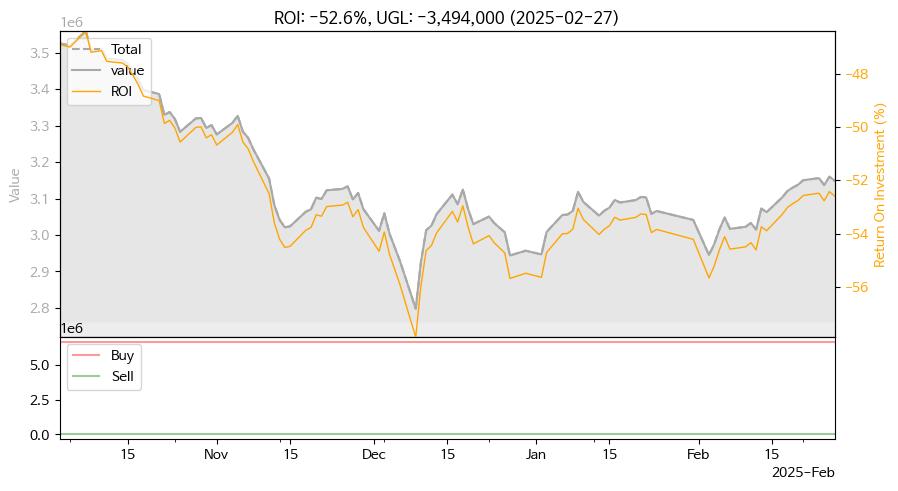

In [46]:
#date=None
date='2024-10-01'
pf_liq.plot(start_date=date)

In [47]:
pf_liq.valuate()

start    2024-01-03
end      2025-02-27
buy       6,642,320
sell            0.0
value     3,148,663
ugl      -3,493,657
roi       -0.525969
dtype: object

In [65]:
pf_liq.valuate(total=False).sort_values('roi', ascending=False)[:10]

,name,start,end,buy,sell,value,ugl,roi
ticker,,,,,,,,
035890,서희건설,2024-01-03,2025-02-26,"298,811",0.0,"262,612","-36,199",-0.121143
011200,HMM,2024-01-03,2025-02-26,"289,861",0.0,"225,500","-64,361",-0.222040
040420,정상제이엘에스,2024-01-03,2025-02-26,"294,901",0.0,"211,270","-83,631",-0.283589
011780,금호석유,2024-01-03,2025-02-26,"342,012",0.0,"236,400","-105,612",-0.308797
066570,LG전자,2024-01-03,2025-02-26,"245,009",0.0,"164,600","-80,409",-0.328188
140520,대창스틸,2024-01-03,2025-02-26,"292,511",0.0,"185,850","-106,661",-0.364639
002220,한일철강,2024-01-03,2025-02-26,"297,361",0.0,"188,860","-108,501",-0.364879
072990,에이치시티,2024-01-03,2025-02-26,"286,210",0.0,"161,248","-124,962",-0.436610
006650,대한유화,2024-01-03,2025-02-26,"181,507",0.0,"96,200","-85,307",-0.469992


In [60]:
#pf_liq.view_record()

## TDF

In [16]:
kw_st = dict(
    method_select = 'selected'    
)

In [17]:
pf_tdf = PM.create_portfolio('TDF_2406', **kw_st, cost=file_cost)
pf_tdf.view_record()

224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2025-01-15 loaded


name  ratio  \
date       ticker                                                             
2024-06-19 K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
2025-01-15 K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-06-19 K55301BU6139      5000000  5000000  0.5000    0.500 2024-06-19  
           K55206C95800      5000000  5000000  0.5000    0.500 2024-06-19  
2025-01-15 K55206C95800            0  5077506  0.1429    0.144 2025-01-15  
           K55301BU6139            0  5077009  0.1429    0.144 2025-01-15  
           K55364CF7048      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234BY9966      5000000  5000000  0.1429    0.142 2025-01-15  
           K55213C50702      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234DF3150      5000000  5000000  0.1429    0.142 2025-01-15  
           K55301BU6253      5000000  5000000  0.1429    0.142 2025-01-15

In [18]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

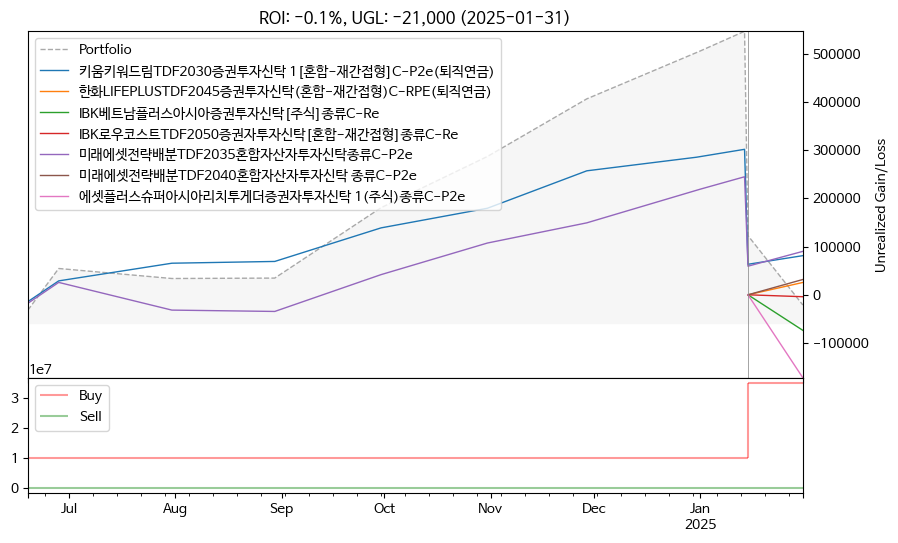

In [19]:
pf_tdf.plot(total=False, roi=False)

In [35]:
date = None
pf_tdf.valuate(date, print_msg=True, join_str=True)
#pf_tdf.valuate(date, total=False)

start, end, buy, sell, value, ugl, roi
2024-06-19, 2025-01-31, 35000000, -31926, 35010787, -21139, -0.0006039576067228269


start    2024-06-19
end      2025-01-31
buy      35,000,000
sell        -31,926
value    35,010,787
ugl         -21,139
roi       -0.000604
dtype: object

In [21]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [22]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_tdf.transaction_pipeline(**kwargs)

pf_tdf.view_record(-1)

7 tickers selected by Selected from 2025-01-31 to 2025-01-31
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 0 %
ROI: 1.1%, UGL: 395,347 (2025-01-31)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                             
2025-01-31 K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-01-31 K55206C95800      -333329  5002379  0.1429    0.143 2025-01-31  
           K55213C50702       -23720  5001866  0.1429    0.143 2025-01-31  
           K55234BY9966        76676  5002979  0.1429    0.143 2025-01-31  
           K55234DF3150         5783  5001824  0.1429    0.143 2025-01-31  
           K55301BU6139      -294521  5001709  0.1429    0.143 2025-01-31  
           K55301BU6253       -30280  5001468  0.1429    0.143 2025-01-31  
           K55364CF7048       173532  5001523  0.1429    0.143 2025-01-31

## HANA

In [25]:
kw_st = dict(
    #tickers = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']
    method_select = 'selected'    
)

In [26]:
pf_hana = PM.create_portfolio('HANA_2408', **kw_st, **kw_cost)
pf_hana.view_record()

64 securities from 2008-11-28 to 2025-01-31 uploaded.
REMINDER: 64 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2024-08-01 loaded


name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000   0.502    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000   0.242    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000   0.186    0.186 2024-08-01  
           K55306CV9946       690000   690000   0.069    0.069 2024-08-01

In [27]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

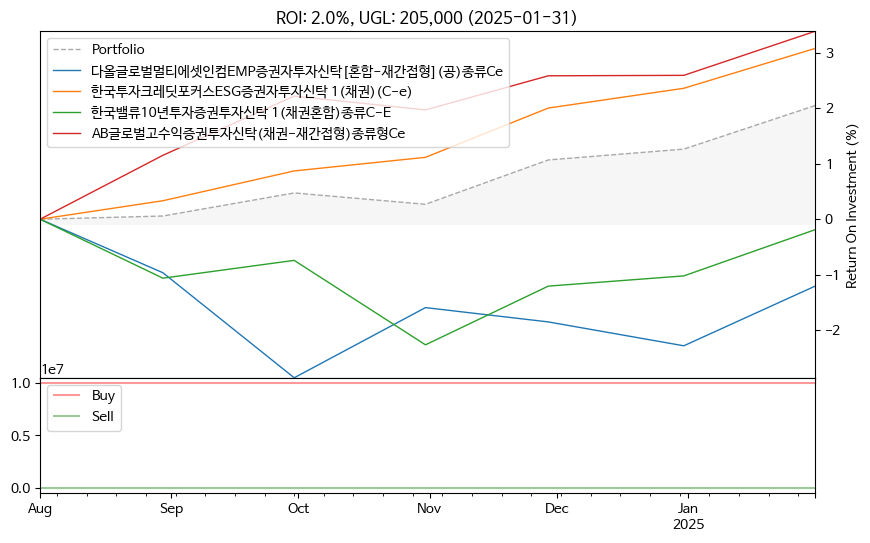

In [28]:
pf_hana.plot(total=False, roi=True)

In [29]:
date = None
pf_hana.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-08-01, 2025-01-31, 9990000, 0.0, 10194581, 204581, 0.0204785785785786


start    2024-08-01
end      2025-01-31
buy       9,990,000
sell            0.0
value    10,194,581
ugl         204,581
roi        0.020479
dtype: object

In [10]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [11]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record()

4 tickers selected by Selected from 2023-01-31 to 2025-01-31
Weights of tickers determined by Inv.Vol.
Mean absolute error of weights: 0 %
ROI: 1.6%, UGL: 175,993 (2025-01-31)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2024-08-01 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
2025-01-31 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 K55306CV9946       690000   690000  0.0690    0.069 2024-08-01  
           KR5101888398      5020000  5020000  0.5020    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000  0.2420    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000  0.1860    0.186 2024-08-01  
2025-01-31 K55306CV9946       -81429   600255  0.0589    0.059 2025-01-31  
           KR5101888398       895986  6070462  0.5955    0.596 2025-01-31  
           KR5236AS4826      -391659  2023777  0.1986    0.199 2025-01-31  
           KR5370AP9956      -425610  1497373  0.1470    0.147 2025-01-31

## SAVE
연금저축

In [4]:
kw_st = dict(
    tickers = ['K55101D20874', 'KR5235AK9808', 'K55307DH1659', 'K55206C11278']
    #method_select = 'selected'    
)

In [5]:
pf_save = PM.create_portfolio('SAVE_2503', **kw_st, **kw_cost)
pf_save.view_record()

224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_250207.csv loaded
REMINDER: make sure this is 1st transaction as no records provided
ERROR: No transaction record


In [6]:
#pf_save.portfolio_data['strategy']
#pf_save.cost
#pf_save.get_names()

In [7]:
pf_save.plot(total=False, roi=True)

In [8]:
date = None
pf_save.valuate(date, print_msg=True, join_str=True)

ERROR: No transaction record


In [9]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [11]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_save.transaction_pipeline(**kwargs)
pf_save.view_record()

4 tickers selected by Selected from 2024-07-31 to 2025-01-31
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 0 %
ROI: 0.0%, UGL: 0.0 (2025-01-31)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                          
2025-01-31 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-01-31 K55101D20874      1748626  1748626    0.25     0.25 2025-01-31  
           KR5235AK9808      1748301  1748301    0.25     0.25 2025-01-31  
           K55307DH1659      1748902  1748902    0.25     0.25 2025-01-31  
           K55206C11278      1748976  1748976    0.25     0.25 2025-01-31

# testing

In [36]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

In [37]:
path_data = 'data'
path_tran = 'transaction'

In [38]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

In [39]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-02-13 uploaded.
Price data loaded
Cost data transaction_cost_250207.csv loaded
Transaction record to 2025-01-16 loaded


In [40]:
date = None
#date = '2025-01-17'
pf_mmt.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-22, 2025-02-13, 42595050, 26775690, 16115000, 295640, 0.0069407016223725915


start    2024-07-22
end      2025-02-13
buy      42,595,050
sell     26,775,690
value    16,115,000
ugl         295,640
roi        0.006941
dtype: object